In [ ]:
const vertShader = `
struct Output {
    @builtin(position) pos: vec4f,
    @location(0) uv: vec2f,
}

@vertex
fn main(
    @builtin(vertex_index) vertexIndex: u32,
) -> Output {
    var pos = array<vec2f, 4>(
        vec2(1, 1), // top-right
        vec2(-1, 1), // top-left
        vec2(1, -1), // bottom-right
        vec2(-1, -1) // bottom-left
    );
    var uv = array<vec2f, 4>(
        vec2(1., 1.), // top-right
        vec2(0., 1.), // top-left
        vec2(1., 0.), // bottom-right
        vec2(0., 0.) // bottom-left
    );
    var out: Output;
    out.pos = vec4f(pos[vertexIndex], 0.0, 1.0);
    out.uv = uv[vertexIndex];
    return out;
}
`

In [ ]:
const fragShader = `
@fragment
fn main(
    @location(0) uv: vec2f,
) -> @location(0) vec4f {
    let red = floor(uv.x * f32(span.x)) / f32(span.x);
    let green = floor(uv.y * f32(span.y)) / f32(span.y);
    return vec4(red, green, blue, 1.0);
}
`

In [ ]:
import { DenoGpuWrapper, d } from "../mod.ts?"

const g = await DenoGpuWrapper.init({
    vertShader,
    fragShader,
    layout: {
        span: { uniform: d.struct({
            x: d.u32,
            y: d.u32,
        }) },
        blue: { uniform: d.f32 },
    }
})

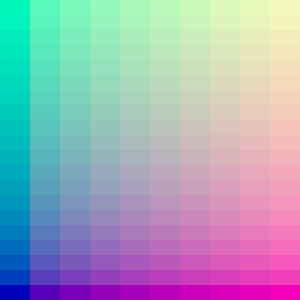

In [ ]:
g.buffers.span.write({
    x: 10,
    y: 20,
})
g.buffers.blue.write(0.5)
g.draw(4)

await g.getImage()